In [3]:
import fiona
import geopandas as gpd

fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
kmlfile = gpd.read_file("sample_data/2018 Central Park Squirrel Census - Squirrel Data.kml")
print(kmlfile)


      Name description timestamp begin end altitudeMode  tessellate  extrude  \
0     None        None       NaT   NaT NaT         None          -1        0   
1     None        None       NaT   NaT NaT         None          -1        0   
2     None        None       NaT   NaT NaT         None          -1        0   
3     None        None       NaT   NaT NaT         None          -1        0   
4     None        None       NaT   NaT NaT         None          -1        0   
...    ...         ...       ...   ...  ..          ...         ...      ...   
3018  None        None       NaT   NaT NaT         None          -1        0   
3019  None        None       NaT   NaT NaT         None          -1        0   
3020  None        None       NaT   NaT NaT         None          -1        0   
3021  None        None       NaT   NaT NaT         None          -1        0   
3022  None        None       NaT   NaT NaT         None          -1        0   

      visibility drawOrder  ...   kuks 

In [4]:
kmlfile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Text(0.5, 1.0, 'Squirrels in Central Park (WGS84)')

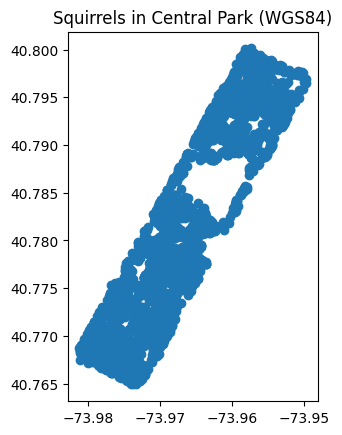

In [5]:
import matplotlib.pyplot as plt
kmlfile.plot()
plt.title('Squirrels in Central Park (WGS84)')


In [6]:
kmlfile.columns

Index(['Name', 'description', 'timestamp', 'begin', 'end', 'altitudeMode',
       'tessellate', 'extrude', 'visibility', 'drawOrder', 'icon', 'x', 'y',
       'unique_squirrel_id', 'hectare', 'shift', 'date',
       'hectare_squirrel_number', 'age', 'primary_fur_color',
       'highlight_fur_color', 'combination_of_primary_and', 'color_notes',
       'location', 'above_ground_sighter', 'specific_location', 'running',
       'chasing', 'climbing', 'eating', 'foraging', 'other_activities', 'kuks',
       'quaas', 'moans', 'tail_flags', 'tail_twitches', 'approaches',
       'indifferent', 'runs_from', 'other_interactions', 'geometry'],
      dtype='object')

In [9]:
import xml.etree.ElementTree as ET
import pandas as pd

tree = ET.parse("sample_data/2018 Central Park Squirrel Census - Squirrel Data.kml")
root = tree.getroot()

# loop through the xml to parse it data point by data point
df = []
for datapoint_i in range(1,3023):
    elementdata = root[0][1][datapoint_i][1]
    df_row = []
    
    for x in elementdata:
        df_row.append(x[0].text)
    
    df.append(df_row)  

# get the column names
column_names = [x.attrib['name'] for x in elementdata]

# make into a dataframe and print
data = pd.DataFrame(df, columns = column_names)
data


,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,other_activities,kuks,quaas,moans,tail_flags,tail_twitches,approaches,indifferent,runs_from,other_interactions
0,-73.9688574691102,40.7837825208444,21B-AM-1019-04,21B,AM,10192018,4,None,None,None,...,None,false,false,false,false,false,false,false,false,None
1,-73.9742811484852,40.775533619083,11B-PM-1014-08,11B,PM,10142018,8,None,Gray,None,...,None,false,false,false,false,false,false,false,false,None
2,-73.9596413903948,40.7903128889029,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,None,...,None,false,false,false,false,false,false,false,true,None
3,-73.9702676472613,40.7762126854894,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,None,false,false,false,false,false,false,false,false,None
4,-73.9683613516225,40.7725908847499,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,None,false,false,false,false,true,false,true,false,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,-73.9639431360458,40.7908677445466,30B-AM-1007-04,30B,AM,10072018,4,Adult,Gray,None,...,None,false,false,false,false,false,false,false,true,None
3018,-73.9704015859639,40.7825600069973,19A-PM-1013-05,19A,PM,10132018,5,Adult,Gray,White,...,None,false,false,false,false,false,false,true,false,None
3019,-73.9665871993517,40.7836775064883,22D-PM-1012-07,22D,PM,10122018,7,Adult,Gray,"Black, Cinnamon, White",...,None,false,false,false,false,false,false,true,false,None
3020,-73.9639941227864,40.7899152327912,29B-PM-1010-02,29B,PM,10102018,2,None,Gray,"Cinnamon, White",...,None,false,false,false,false,false,false,true,false,None


In [16]:
AM_data = data[data['shift'] == 'AM']
PM_data = data[data['shift'] == 'PM']


In [17]:
AM_geodata = gpd.GeoDataFrame(AM_data, geometry=gpd.points_from_xy(AM_data['x'], AM_data['y']))
PM_geodata = gpd.GeoDataFrame(PM_data, geometry=gpd.points_from_xy(PM_data['x'], PM_data['y']))


Text(0.5, 1.0, 'PM squirrels')

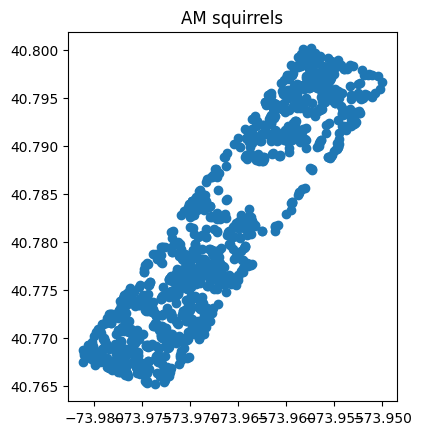

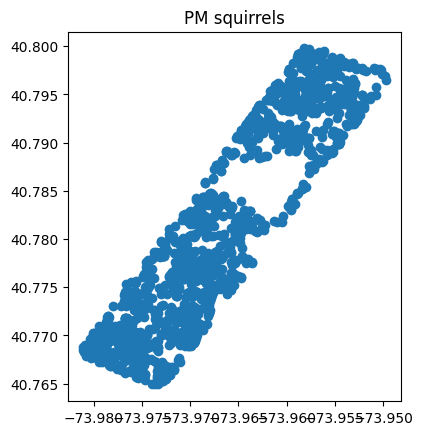

In [18]:
AM_geodata.plot()
plt.title('AM squirrels')

PM_geodata.plot()
plt.title('PM squirrels')


In [20]:
import pandas as pd
flights_data = pd.read_csv('sample_data/flights.csv')
flights_data


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21296\2852580721.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv('sample_data/flights.csv')


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
geolookup = pd.read_csv('sample_data/airports.csv')
geolookup


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [24]:
# convert coordinates of geo lookup to a Point
# make to and from data set for to and from join
from shapely.geometry import Point
from_geo_lookup = geolookup[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].copy()
from_geo_lookup['geometry_from']= [Point(x,y) for x,y in zip( from_geo_lookup['LONGITUDE'], from_geo_lookup['LATITUDE'])]
from_geo_lookup = from_geo_lookup[['IATA_CODE','geometry_from' ]]

to_geo_lookup = geolookup[['IATA_CODE', 'LATITUDE', 'LONGITUDE']].copy()
to_geo_lookup['geometry_to']= [Point(x,y) for x,y in zip( to_geo_lookup['LONGITUDE'], to_geo_lookup['LATITUDE'])]
to_geo_lookup = to_geo_lookup[['IATA_CODE','geometry_to' ]]


c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\Administrator\PycharmProjects\env_py310\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [25]:
# align data types for the joins
from_geo_lookup['IATA_CODE'] = from_geo_lookup['IATA_CODE'].map(str)
to_geo_lookup['IATA_CODE'] = to_geo_lookup['IATA_CODE'].map(str)

flights_data['ORIGIN_AIRPORT'] = flights_data['ORIGIN_AIRPORT'].map(str)
flights_data['DESTINATION_AIRPORT'] = flights_data['DESTINATION_AIRPORT'].map(str)
flights_data = flights_data[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]


In [26]:
flights_data = flights_data.merge(from_geo_lookup, left_on = 'ORIGIN_AIRPORT', right_on = 'IATA_CODE')
flights_data = flights_data.merge(to_geo_lookup, left_on = 'DESTINATION_AIRPORT', right_on = 'IATA_CODE')
flights_data = flights_data[['geometry_from', 'geometry_to']]
flights_data


,geometry_from,geometry_to
0,POINT (-149.99619 61.17432),POINT (-122.30931 47.44898)
1,POINT (-149.99619 61.17432),POINT (-122.30931 47.44898)
2,POINT (-149.99619 61.17432),POINT (-122.30931 47.44898)
3,POINT (-149.99619 61.17432),POINT (-122.30931 47.44898)
4,POINT (-149.99619 61.17432),POINT (-122.30931 47.44898)
...,...,...
5332909,POINT (-132.94528 56.80165),POINT (-132.36982 56.48433)
5332910,POINT (-132.94528 56.80165),POINT (-132.36982 56.48433)
5332911,POINT (-132.94528 56.80165),POINT (-132.36982 56.48433)
5332912,POINT (-132.94528 56.80165),POINT (-132.36982 56.48433)


In [27]:
# convert points to lines
from shapely.geometry import LineString

lines = []
for i,row in flights_data.iterrows():
    try:
        point_from = row['geometry_from']
        point_to = row['geometry_to']
        lines.append(LineString([point_from, point_to]))
    except:
        pass
    
geodf = gpd.GeoDataFrame(lines, columns=['geometry'])
geodf


In [ ]:
# plot the lines
import matplotlib.pyplot as plt
geodf.plot(figsize=(12,12))
plt.title('the world as airpline trajectory lines')


In [1]:
import geopandas as gpd
geojsonfile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print(geojsonfile)


         pop_est      continent                      name iso_a3  gdp_md_est  \
0       889953.0        Oceania                      Fiji    FJI        5496   
1     58005463.0         Africa                  Tanzania    TZA       63177   
2       603253.0         Africa                 W. Sahara    ESH         907   
3     37589262.0  North America                    Canada    CAN     1736425   
4    328239523.0  North America  United States of America    USA    21433226   
..           ...            ...                       ...    ...         ...   
172    6944975.0         Europe                    Serbia    SRB       51475   
173     622137.0         Europe                Montenegro    MNE        5542   
174    1794248.0         Europe                    Kosovo    KOS        7926   
175    1394973.0  North America       Trinidad and Tobago    TTO       24269   
176   11062113.0         Africa                  S. Sudan    SSD       11998   

                                       

<AxesSubplot:>

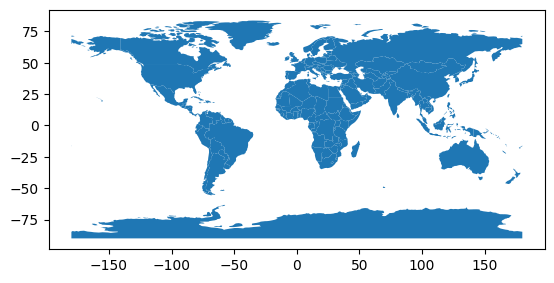

In [2]:
geojsonfile.plot()

In [3]:
geojsonfile['area'] = geojsonfile['geometry'].apply(lambda x: x.area)
geojsonfile.sort_values('area').head(10)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area
128,619896.0,Europe,Luxembourg,LUX,71104,"POLYGON ((6.04307 50.12805, 6.24275 49.90223, ...",0.301516
160,326000.0,Asia,N. Cyprus,CYN,3600,"POLYGON ((32.73178 35.14003, 32.80247 35.14550...",0.374644
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344...",0.480314
161,1198575.0,Asia,Cyprus,CYP,24948,"POLYGON ((32.73178 35.14003, 32.91957 35.08783...",0.613351
89,299882.0,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",0.631326
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.639000
45,3193694.0,North America,Puerto Rico,PRI,104988,"POLYGON ((-66.28243 18.51476, -65.77130 18.426...",0.788009
149,433285.0,Asia,Brunei,BRN,13469,"POLYGON ((115.45071 5.44773, 115.40570 4.95523...",0.872053
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427...",0.983810
85,2832067.0,Asia,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",1.015639


In [4]:
geojsonfile['length'] = geojsonfile['geometry'].apply(lambda x: x.length)
geojsonfile.sort_values('length', ascending=False).head(10)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,area,length
159,4.490000e+03,Antarctica,Antarctica,ATA,898,"MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...",6028.836194,1041.993521
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",1712.995228,916.062855
18,1.443735e+08,Europe,Russia,RUS,1699876,"MULTIPOLYGON (((178.72530 71.09880, 180.00000 ...",2935.205205,766.391129
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1122.281921,356.977119
22,5.622500e+04,North America,Greenland,GRL,3051,"POLYGON ((-46.76379 82.62796, -43.40644 83.225...",677.509565,235.678216
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",954.635341,221.976583
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",148.135821,215.431767
137,2.536431e+07,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",695.545501,162.605664
29,2.110495e+08,South America,Brazil,BRA,1839758,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",710.185243,158.445684
21,5.347896e+06,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",90.496255,127.160983


In [5]:
import rasterio
griddata = r'sample_data/ore-kbz-mnt-litto3d-5m.tif'
img = rasterio.open(griddata)
matrix = img.read()
matrix


array([[[56.  , 55.96, 56.06, ...,  0.38,  0.44,  0.56],
        [56.04, 56.05, 56.  , ...,  0.31,  0.43,  0.42],
        [56.  , 55.99, 56.02, ...,  0.38,  0.51,  0.37],
        ...,
        [55.68, 55.83, 55.88, ..., 37.67, 37.72, 37.78],
        [55.69, 55.74, 55.78, ..., 37.71, 37.76, 37.83],
        [55.9 , 55.77, 55.92, ..., 37.76, 37.79, 37.87]]])

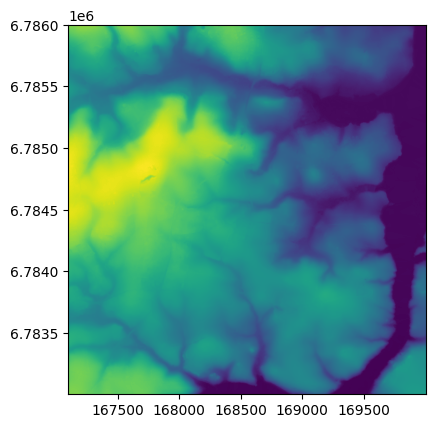

<AxesSubplot:>

In [6]:
from rasterio.plot import show
show(img)
